In [6]:
import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score




In [37]:
dados = pd.read_csv('precos_carros_brasil.csv')
dados = dados.dropna()
dados.head(5)

,year_of_reference,month_of_reference,fipe_code,authentication,brand,model,fuel,gear,engine_size,year_model,avg_price_brl
0,2021.0,January,004001-0,cfzlctzfwrcp,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual,1,2002.0,9162.0
1,2021.0,January,004001-0,cdqwxwpw3y2p,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual,1,2001.0,8832.0
2,2021.0,January,004001-0,cb1t3xwwj1xp,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual,1,2000.0,8388.0
3,2021.0,January,004001-0,cb9gct6j65r0,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Alcohol,manual,1,2000.0,8453.0
4,2021.0,January,004003-7,g15wg0gbz1fx,GM - Chevrolet,Corsa Pick-Up GL/ Champ 1.6 MPFI / EFI,Gasoline,manual,"1,6",2001.0,12525.0


Aqui será feita a alteração das variaveis da coluta 'gear', elas passarão a ser do tipo 'Category' com valores variando entre 0 (automatic) e 1 (manual).

In [38]:
dados['gear'] = LabelEncoder().fit_transform(dados['gear'])
dados.tail(2)


,year_of_reference,month_of_reference,fipe_code,authentication,brand,model,fuel,gear,engine_size,year_model,avg_price_brl
202295,2023.0,January,005540-9,9w64fg6dhqp,VW - VolksWagen,Polo Track 1.0 Flex 12V 5p,Gasoline,1,1,2023.0,80845.0
202296,2023.0,January,005540-9,7hbnjmj9z5dqw,VW - VolksWagen,Polo Track 1.0 Flex 12V 5p,Gasoline,1,1,2023.0,74458.0


Aqui será feita a alteração das variaveis da coluna 'fuel', elas passarão a ser do tipo 'Category' com valores variando entre 0 (Alcohol), 1 (Diesel) e 2 (Gasolina).

In [39]:
dados['fuel'] = LabelEncoder().fit_transform(dados['fuel'])
dados.head()

,year_of_reference,month_of_reference,fipe_code,authentication,brand,model,fuel,gear,engine_size,year_model,avg_price_brl
0,2021.0,January,004001-0,cfzlctzfwrcp,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,2,1,1,2002.0,9162.0
1,2021.0,January,004001-0,cdqwxwpw3y2p,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,2,1,1,2001.0,8832.0
2,2021.0,January,004001-0,cb1t3xwwj1xp,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,2,1,1,2000.0,8388.0
3,2021.0,January,004001-0,cb9gct6j65r0,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,0,1,1,2000.0,8453.0
4,2021.0,January,004003-7,g15wg0gbz1fx,GM - Chevrolet,Corsa Pick-Up GL/ Champ 1.6 MPFI / EFI,2,1,"1,6",2001.0,12525.0


Aqui será feita a alteração das variaveis da coluna 'brand', elas passarão a ser do tipo 'Category' com um numero limitado de opções. A marcas assumirão valores numericos, 0 (Fiat), 1 (Ford), 2 (GM), 3 (Nissan), 4 (Renault) e 5 (VW).

In [40]:
dados['brand'] = LabelEncoder().fit_transform(dados['brand'])

In [31]:
dados['brand'].value_counts()

brand
0    44962
5    44312
2    38590
1    33151
4    29192
3    12090
Name: count, dtype: int64

Aqui é feito a alteração da coluna 'engine_size', o primeiro passo é alterar o caracter "," pelo caracter ".", pois o metodo que faz a conversão de texto para valores numericos não soube lidar com a maneira como o Português lida com casas decimais, pois isso, é necessário alterar o caracter para que o Python entenda que se trata de um numero decimal. Em seguida o metodo "pandas.to_numeric()" é usado para converter os valores da coluna 'engine_size'.

In [41]:
dados['engine_size'] = dados['engine_size'].str.replace(',','.')
dados['engine_size - numeric'] = pd.to_numeric(dados['engine_size']) 
dados.head()

,year_of_reference,month_of_reference,fipe_code,authentication,brand,model,fuel,gear,engine_size,year_model,avg_price_brl,engine_size - numeric
0,2021.0,January,004001-0,cfzlctzfwrcp,2,Corsa Wind 1.0 MPFI / EFI 2p,2,1,1,2002.0,9162.0,1.0
1,2021.0,January,004001-0,cdqwxwpw3y2p,2,Corsa Wind 1.0 MPFI / EFI 2p,2,1,1,2001.0,8832.0,1.0
2,2021.0,January,004001-0,cb1t3xwwj1xp,2,Corsa Wind 1.0 MPFI / EFI 2p,2,1,1,2000.0,8388.0,1.0
3,2021.0,January,004001-0,cb9gct6j65r0,2,Corsa Wind 1.0 MPFI / EFI 2p,0,1,1,2000.0,8453.0,1.0
4,2021.0,January,004003-7,g15wg0gbz1fx,2,Corsa Pick-Up GL/ Champ 1.6 MPFI / EFI,2,1,1.6,2001.0,12525.0,1.6


In [42]:
dados_num = dados.drop(['month_of_reference','fipe_code','authentication','model','engine_size'],axis=1)
dados_num.head()

,year_of_reference,brand,fuel,gear,year_model,avg_price_brl,engine_size - numeric
0,2021.0,2,2,1,2002.0,9162.0,1.0
1,2021.0,2,2,1,2001.0,8832.0,1.0
2,2021.0,2,2,1,2000.0,8388.0,1.0
3,2021.0,2,0,1,2000.0,8453.0,1.0
4,2021.0,2,2,1,2001.0,12525.0,1.6


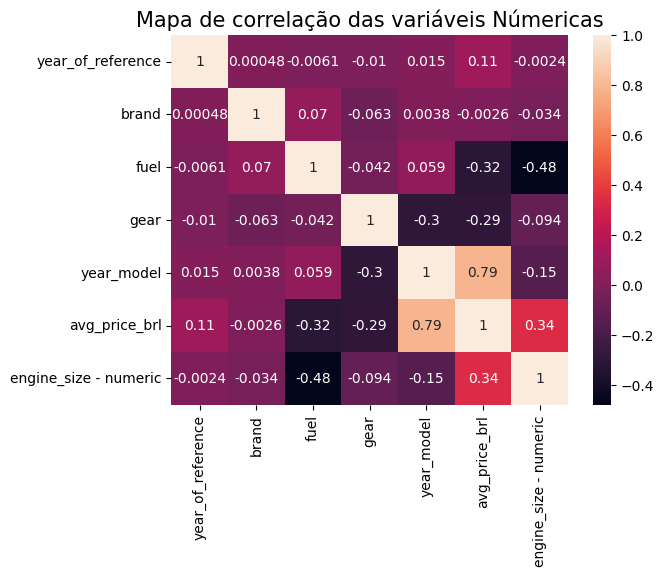

In [43]:
sns.heatmap(dados_num.corr('spearman'),annot=True)
plt.title('Mapa de correlação das variáveis Númericas',fontsize=15)
plt.show()

In [44]:
X = dados_num.drop('avg_price_brl',axis=1)
X.head()

,year_of_reference,brand,fuel,gear,year_model,engine_size - numeric
0,2021.0,2,2,1,2002.0,1.0
1,2021.0,2,2,1,2001.0,1.0
2,2021.0,2,2,1,2000.0,1.0
3,2021.0,2,0,1,2000.0,1.0
4,2021.0,2,2,1,2001.0,1.6


In [45]:
Y = dados_num['avg_price_brl']
Y.head()

0     9162.0
1     8832.0
2     8388.0
3     8453.0
4    12525.0
Name: avg_price_brl, dtype: float64

In [46]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.30, random_state=42)

In [47]:
model_rf = RandomForestRegressor()

In [48]:
model_rf.fit(X_train,Y_train)

RandomForestRegressor()

In [49]:
valores_preditos_rf = model_rf.predict(X_test)

In [50]:
valores_preditos_rf

array([ 41637.24330985,  12722.32982722,  23743.69332394, ...,
        36939.51713201,  88318.359973  , 123874.51745152])

In [55]:
model_rf.feature_importances_
feature_importances = pd.DataFrame(model_rf.feature_importances_, index= X_train.columns, columns=['importance']).sort_values('importance',ascending = False)
feature_importances

,importance
engine_size - numeric,0.479963
year_model,0.406837
gear,0.037957
fuel,0.035003
brand,0.026921
year_of_reference,0.013320
